In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv("dataset/titanic3.csv")
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# null 값을 다른 값으로 대체

In [331]:
df.embarked.fillna(df.embarked.value_counts().idxmax(),inplace=True)

In [349]:
df[df.fare.isnull() == True]

df[df.pclass == 3]['fare'].mean()

df.fare.replace(np.nan, df[df.pclass ==3]['fare'].mean(), inplace=True)

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [203]:
# embarked
# 1등실, 여성, 생존함, 80 fare

df[df.embarked.isnull() == True]



SyntaxError: invalid syntax (1388684004.py, line 6)

In [247]:
df.embarked.replace(np.nan, 'S', inplace=True)

In [259]:
df.embarked.fillna(df.embarked.value_counts().idxmax(), inplace=True)

In [261]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [162]:
import re

pattern = r',\s*([\w\s]+)\.'

df['title'] = df.name.str.extract(pattern)[0]

df.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: title, dtype: int64

In [164]:
import pandas as pd
import numpy as np

# 나이(null 값)에 대한 평균과 표준편차 계산
mean_age = df['age'].mean()
std_age = df['age'].std()

# 나이(null 값)을 평균과 표준편차를 고려한 랜덤 값으로 채우기
null_age_count = df['age'].isnull().sum() # 나이(null 값)의 개수
random_age = np.random.normal(mean_age, std_age, null_age_count) # 정규분포를 따르는 랜덤 값 생성
random_age = np.abs(random_age) # 랜덤 값의 절대값 적용
random_age = np.round(random_age, 2) # 소수점 2자리로 반올림
df['age'][df['age'].isnull()] = random_age # 나이(null 값)을 랜덤 값으로 채우기

C:\Users\h\AppData\Local\Temp\ipykernel_12732\41646555.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][df['age'].isnull()] = random_age # 나이(null 값)을 랜덤 값으로 채우기


In [167]:
def age_category(x):
    cat=''
    if x < 15: cat = 'Child'
    elif x < 35: cat = 'Young'
    elif x < 50: cat = 'Young Adult'
    elif x < 65: cat = 'Adult'
    els: cat = 'Elder'
    return cat

df['age_cat'] = df.age.apply(lambda x: age_category(x))

In [174]:
df.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Young,Miss


<AxesSubplot:xlabel='age', ylabel='fare'>

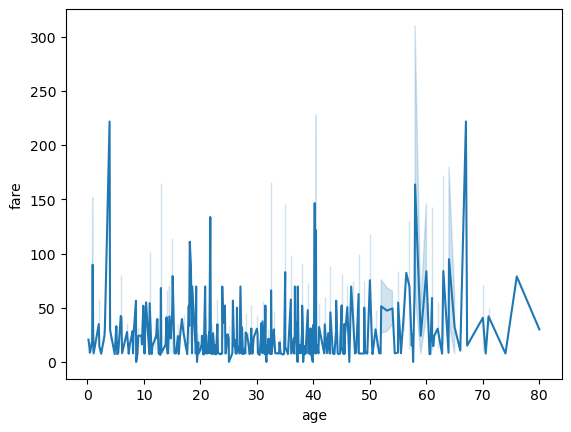

In [182]:
sns.lineplot(data=df, x='age', y='fare')

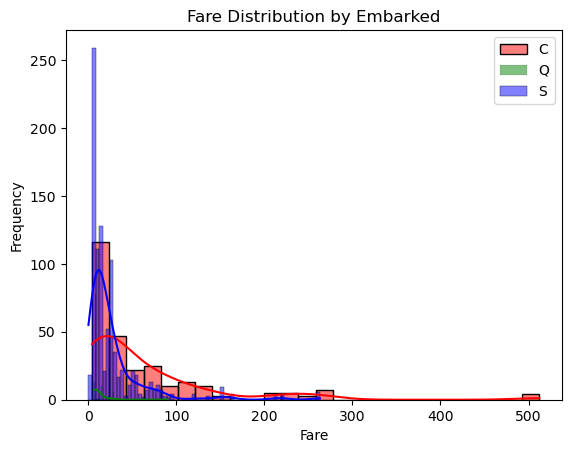

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Embarked가 null인 행 제거
df.dropna(subset=['embarked'], inplace=True)

# Embarked별 Fare의 분포를 그래프로 시각화
sns.histplot(df[df['embarked'] == 'C']['fare'], color='red', label='C', kde=True)
sns.histplot(df[df['embarked'] == 'Q']['fare'], color='green', label='Q', kde=True)
sns.histplot(df[df['embarked'] == 'S']['fare'], color='blue', label='S', kde=True)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution by Embarked')
plt.legend()
plt.show()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# name column에서 호칭, 직함, 직업 등의 정보 빼기

In [4]:
import re

# 정규표현식 패턴
pattern = r',\s*([\w\s]+)\.'

# Name 컬럼(column)에서 호칭(prefix)을 추출하여 새로운 컬럼(column) Title에 저장
df['title'] = df['name'].str.extract(pattern)[0]

# 결과 확인
print(df['title'].value_counts())

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: title, dtype: int64


# 불필요 columns 삭제

In [5]:
df.drop(["ticket","body",'boat','home.dest','name'], axis =1, inplace = True)

# sex

# age
- title 컬럼을 기반으로 범주화

In [6]:
# null 값 -> 평균값으로 변경
df["age"].fillna(df["age"].mean(), inplace = True)

In [7]:
def ctage(age):
    cat = ""
    if age < 15: cat = 'Baby-Young'
    elif age < 45: cat = 'Young Adult'
    elif age < 65: cat = 'Adult'
    else : cat = 'Elder'
    return cat
    
    
df["age_cat"] = df.age.apply(lambda x: ctage(x))

df['age_cat'] = df['age_cat'].astype('category')

# sibsp

# parch

In [8]:
def get_ct(parch):
    cat = ""
    if parch != 0: cat = "o"
    else: cat = "x"
    return cat
        
df["parch_cat"] = df["parch"].apply(lambda x : get_ct(x))

# fare
- pclass별로 fare 분포를 보고, fare를 적절하게 범주화한다.
겹치는 부분이 거의 영향 없게끔 (불가능하면 확실한 1 pclass만 참고)
null값이 있는 cabin의 fare 금액별로 

In [9]:
# fare의 null값이 pclass3 한 개여서 pclass3 fare 평균값으로 바꿔줌

import pandas as pd

fare_mean = df['fare'].mean()
df['fare'].fillna(fare_mean, inplace=True)

# embarked

# 특이사항
- Southampton 914명
- Cherbourg 270명 (이 지역 탑승 인원은 1등실 비율이 많음, fare도 가장 높음, 생존률도 가장 높음)
- Queenstown 123명 (거의 3등실)

In [10]:
# 결측치 처리
# pclass1이고, fare 80, 생존률 높은 B cabin -> embarked를 'C'로 처리함

df.embarked.replace(np.nan, 'C', inplace=True)

# 범주형 colums -> category화

In [11]:
# age age_cat - 앞에서 미리 한 것들, 문제가될 시 여기서 범주화할 것

df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   sex        1309 non-null   category
 3   age        1309 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   fare       1309 non-null   float64 
 7   cabin      295 non-null    object  
 8   embarked   1309 non-null   category
 9   title      1309 non-null   object  
 10  age_cat    1309 non-null   category
 11  parch_cat  1309 non-null   object  
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 96.4+ KB


# One-Hot Encoding

In [13]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['sex'])
df.head(3)

,pclass,survived,age,sibsp,parch,fare,cabin,embarked,title,age_cat,parch_cat,sex_female,sex_male
0,1,1,29.00,0,0,211.3375,B5,S,Miss,Young Adult,x,1,0
1,1,1,0.92,1,2,151.5500,C22 C26,S,Master,Baby-Young,o,0,1
2,1,0,2.00,1,2,151.5500,C22 C26,S,Miss,Baby-Young,o,1,0


In [14]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['age_cat'])
df.head(3)

,pclass,survived,age,sibsp,parch,fare,cabin,embarked,title,parch_cat,sex_female,sex_male,age_cat_Adult,age_cat_Baby-Young,age_cat_Elder,age_cat_Young Adult
0,1,1,29.00,0,0,211.3375,B5,S,Miss,x,1,0,0,0,0,1
1,1,1,0.92,1,2,151.5500,C22 C26,S,Master,o,0,1,0,1,0,0
2,1,0,2.00,1,2,151.5500,C22 C26,S,Miss,o,1,0,0,1,0,0


In [15]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['embarked'])
df.head(3)

,pclass,survived,age,sibsp,parch,fare,cabin,title,parch_cat,sex_female,sex_male,age_cat_Adult,age_cat_Baby-Young,age_cat_Elder,age_cat_Young Adult,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,B5,Miss,x,1,0,0,0,0,1,0,0,1
1,1,1,0.92,1,2,151.5500,C22 C26,Master,o,0,1,0,1,0,0,0,0,1
2,1,0,2.00,1,2,151.5500,C22 C26,Miss,o,1,0,0,1,0,0,0,0,1


In [16]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['title'])
df.head(3)

,pclass,survived,age,sibsp,parch,fare,cabin,parch_cat,sex_female,sex_male,...,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess
0,1,1,29.00,0,0,211.3375,B5,x,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0.92,1,2,151.5500,C22 C26,o,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,2.00,1,2,151.5500,C22 C26,o,1,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['parch_cat'])
df.head(3)

,pclass,survived,age,sibsp,parch,fare,cabin,sex_female,sex_male,age_cat_Adult,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,parch_cat_o,parch_cat_x
0,1,1,29.00,0,0,211.3375,B5,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0.92,1,2,151.5500,C22 C26,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,2.00,1,2,151.5500,C22 C26,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['cabin'])
df.head(3)

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,age_cat_Adult,age_cat_Baby-Young,...,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
0,1,1,29.00,0,0,211.3375,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.92,1,2,151.5500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2.00,1,2,151.5500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 221 entries, pclass to cabin_T
dtypes: float64(2), int64(4), uint8(215)
memory usage: 336.3 KB


In [20]:
titanic_df = df.copy()

In [21]:
# 분석용 데이터 셋
titanic_df.to_pickle('dataset/tdf.pkl')
titanic_df = pd.read_pickle('dataset/tdf.pkl')

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = titanic_df['survived'] # 종속변수
X_t_df = titanic_df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


(1047, 220)
(262, 220)


In [104]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.83, lr 정확도:0.82


C:\app\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
df.age

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
        ...  
1304    14.50
1305      NaN
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1309, dtype: float64

In [150]:
import pandas as pd
import numpy as np

# 나이(null 값)에 대한 평균과 표준편차 계산
mean_age = df['age'].mean()
std_age = df['age'].std()

# 나이(null 값)을 평균과 표준편차를 가지는 정규분포를 따르는 랜덤 값으로 채우기
null_age_count = df['age'].isnull().sum() # 나이(null 값)의 개수
random_age = np.random.normal(mean_age, std_age, null_age_count) # 정규분포를 따르는 랜덤 값 생성
df['age'][df['age'].isnull()] = random_age # 나이(null 값)을 랜덤 값으로 채우기

# 결과 확인
print(df['age'])


0       1000.00000
1          0.92000
2          2.00000
3         30.00000
4         25.00000
           ...    
1304      14.50000
1305      27.01077
1306      26.50000
1307      27.00000
1308      29.00000
Name: age, Length: 1309, dtype: float64


C:\Users\h\AppData\Local\Temp\ipykernel_12732\3665907254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][df['age'].isnull()] = random_age # 나이(null 값)을 랜덤 값으로 채우기


In [155]:
df.age[40]

81.7887946020825